**LSTM forecast for SAG Mill 1**

In [ ]:
# Import necessary libraries
!pip install numpy pandas

import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Define function to generate synthetic data for each variable
def generate_data(mean, std_dev, min_val, max_val, count):
    data = np.random.normal(loc=mean, scale=std_dev, size=count)
    # Clip data to meet min and max values
    data = np.clip(data, min_val, max_val)
    return data

# Parameters for each variable from the table
variables_train = {
    "Feed Tonnage": {"mean": 911, "std_dev": 497, "min": 0, "max": 2111, "count": 8170},
    "Energy Consumption": {"mean": 9927, "std_dev": 1245, "min": 0, "max": 12248, "count": 8170},
    "Bearing Pressure": {"mean": 12.7, "std_dev": 2.2, "min": 0, "max": 13.7, "count": 8170},
    "Spindle Speed": {"mean": 9.2, "std_dev": 0.7, "min": 0, "max": 10.3, "count": 8170}
}

variables_test = {
    "Feed Tonnage": {"mean": 884, "std_dev": 480, "min": 0, "max": 1953, "count": 8170},
    "Energy Consumption": {"mean": 8920, "std_dev": 959, "min": 0, "max": 10809, "count": 8170},
    "Bearing Pressure": {"mean": 11.9, "std_dev": 2.2, "min": 0, "max": 13.7, "count": 8170},
    "Spindle Speed": {"mean": 9.1, "std_dev": 0.7, "min": 0, "max": 10.7, "count": 8170}
}

# Generate synthetic data for training and testing datasets
training_data = {}
testing_data = {}

for variable, params in variables_train.items():
    training_data[variable] = generate_data(
        mean=params["mean"],
        std_dev=params["std_dev"],
        min_val=params["min"],
        max_val=params["max"],
        count=params["count"]
    )

for variable, params in variables_test.items():
    testing_data[variable] = generate_data(
        mean=params["mean"],
        std_dev=params["std_dev"],
        min_val=params["min"],
        max_val=params["max"],
        count=params["count"]
    )

# Convert dictionaries to DataFrames
training_df = pd.DataFrame(training_data)
testing_df = pd.DataFrame(testing_data)

# Display first few rows to verify
print("Training Data Sample:")
print(training_df.head())
print("\nTesting Data Sample:")
print(testing_df.head())

# Optionally save datasets as CSV files
training_df.to_csv("training_data.csv", index=False)
testing_df.to_csv("testing_data.csv", index=False)


Training Data Sample:
   Feed Tonnage  Energy Consumption  Bearing Pressure  Spindle Speed
0   1157.866934         9250.441565         12.373984       9.945931
1    842.282642        11500.500644         13.700000       8.381895
2   1232.901203        10253.816099         11.717923       9.399841
3   1667.945839         8950.715996         13.700000       8.129689
4    794.625773         9340.909902         10.926071       9.505450

Testing Data Sample:
   Feed Tonnage  Energy Consumption  Bearing Pressure  Spindle Speed
0    728.189816         9530.216204         11.759309      10.700000
1    896.290954         9382.970278         11.692695       9.631884
2   1401.492867         8574.693587         11.155849       8.756315
3   1617.965536        10737.814139         12.381456       9.403334
4    957.479483         8447.013159         13.700000       9.412891


Training Data Sample:
   Feed Tonnage  Energy Consumption  Bearing Pressure  Spindle Speed
0   1157.866934         9250.441565         12.373984       9.945931
1    842.282642        11500.500644         13.700000       8.381895
2   1232.901203        10253.816099         11.717923       9.399841
3   1667.945839         8950.715996         13.700000       8.129689
4    794.625773         9340.909902         10.926071       9.505450

Testing Data Sample:
   Feed Tonnage  Energy Consumption  Bearing Pressure  Spindle Speed
0    728.189816         9530.216204         11.759309      10.700000
1    896.290954         9382.970278         11.692695       9.631884
2   1401.492867         8574.693587         11.155849       8.756315
3   1617.965536        10737.814139         12.381456       9.403334
4    957.479483         8447.013159         13.700000       9.412891


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - loss: 0.0635 - val_loss: 0.0485
Epoch 2/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - loss: 0.0539 - val_loss: 0.0480
Epoch 3/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - loss: 0.0533 - val_loss: 0.0478
Epoch 4/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - loss: 0.0536 - val_loss: 0.0476
Epoch 5/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - loss: 0.0528 - val_loss: 0.0476
Epoch 6/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - loss: 0.0546 - val_loss: 0.0476
Epoch 7/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - loss: 0.0538 - val_loss: 0.0478
Epoch 8/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - loss: 0.0543 - val_loss: 0.0475
Epoch 9/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 22s 77ms/step - loss: 0.0523 - val_loss: 0.0476
Epoch 10/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - loss: 0.0528 - val_loss: 0.0475
Epoch 11/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - loss: 0.0520 - val_loss: 0.0537
Epoch 12/20
254/254 ━━━━━━━━━━

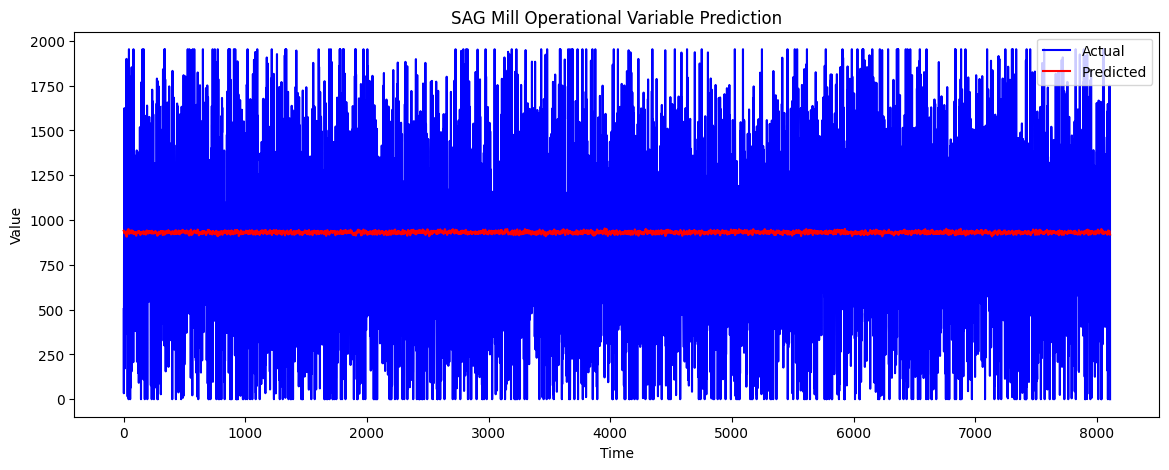

In [ ]:
# Import necessary libraries
!pip install numpy pandas tensorflow matplotlib scikit-learn

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Display first few rows to verify
print("Training Data Sample:")
print(training_df.head())
print("\nTesting Data Sample:")
print(testing_df.head())

# Preprocess Data
# Combine training and testing data to apply scaling consistently
combined_data = pd.concat([training_df, testing_df], axis=0)

# Scale data to range [0, 1] for better LSTM performance
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(combined_data)

# Separate scaled data back into training and testing sets
scaled_training_data = scaled_data[:len(training_df)]
scaled_testing_data = scaled_data[len(training_df):]

# Define the sequence length for LSTM
sequence_length = 60  # Use 60 timesteps for each sequence, can be adjusted

# Prepare the input-output sequences for training data
X_train, y_train = [], []
for i in range(sequence_length, len(scaled_training_data)):
    X_train.append(scaled_training_data[i-sequence_length:i, :])  # Previous 60 timesteps as input
    y_train.append(scaled_training_data[i, 0])  # Predict next value for the first feature as output

X_train, y_train = np.array(X_train), np.array(y_train)

# Prepare the input-output sequences for testing data
X_test, y_test = [], []
for i in range(sequence_length, len(scaled_testing_data)):
    X_test.append(scaled_testing_data[i-sequence_length:i, :])  # Previous 60 timesteps as input
    y_test.append(scaled_testing_data[i, 0])  # Predict next value for the first feature as output

X_test, y_test = np.array(X_test), np.array(y_test)

# Define the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Single output unit

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the Model
# Make predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(np.concatenate((predicted, np.zeros((predicted.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, predicted))
print(f'Root Mean Squared Error: {rmse}')

# Plot Results
plt.figure(figsize=(14,5))
plt.plot(y_test_inv, color='blue', label='Actual')
plt.plot(predicted, color='red', label='Predicted')
plt.title('SAG Mill Operational Variable Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


**LSTM forecast for Mill 2**

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Define function to generate synthetic data for each variable
def generate_data(mean, std_dev, min_val, max_val, count):
    data = np.random.normal(loc=mean, scale=std_dev, size=count)
    # Clip data to meet min and max values
    data = np.clip(data, min_val, max_val)
    return data

# Parameters for each variable from the table
variables_train = {
    "Feed Tonnage": {"mean": 2077, "std_dev": 1136, "min": 0, "max": 3477, "count": 7953},
    "Energy Consumption": {"mean": 16709, "std_dev": 1504, "min": 0, "max": 19688, "count": 7953},
    "Bearing Pressure": {"mean": 13.8, "std_dev": 3.5, "min": 0, "max": 18.3, "count": 7953},
    "Spindle Speed": {"mean": 9.1, "std_dev": 0.6, "min": 0, "max": 10, "count": 7953}
}

variables_test = {
    "Feed Tonnage": {"mean": 2073, "std_dev": 1134, "min": 0, "max": 3452, "count": 7952},
    "Energy Consumption": {"mean": 17445, "std_dev": 1462, "min": 0, "max": 19533, "count": 7952},
    "Bearing Pressure": {"mean": 14.8, "std_dev": 3.8, "min": 0, "max": 18.3, "count": 7952},
    "Spindle Speed": {"mean": 8.9, "std_dev": 0.6, "min": 0, "max": 10, "count": 7952}
}

# Generate synthetic data for training and testing datasets
training_data = {}
testing_data = {}

for variable, params in variables_train.items():
    training_data[variable] = generate_data(
        mean=params["mean"],
        std_dev=params["std_dev"],
        min_val=params["min"],
        max_val=params["max"],
        count=params["count"]
    )

for variable, params in variables_test.items():
    testing_data[variable] = generate_data(
        mean=params["mean"],
        std_dev=params["std_dev"],
        min_val=params["min"],
        max_val=params["max"],
        count=params["count"]
    )

# Convert dictionaries to DataFrames
training_df = pd.DataFrame(training_data)
testing_df = pd.DataFrame(testing_data)

# Display first few rows to verify
print("Training Data Sample:")
print(training_df.head())
print("\nTesting Data Sample:")
print(testing_df.head())

# Optionally save datasets as CSV files
training_df.to_csv("training_data.csv", index=False)
testing_df.to_csv("testing_data.csv", index=False)

Training Data Sample:
   Feed Tonnage  Energy Consumption  Bearing Pressure  Spindle Speed
0   2641.267278        14618.770665         18.300000       9.134790
1   1919.931754        18742.467206         13.088456       8.372371
2   2812.774179        19688.000000         17.956571       9.640519
3   3477.000000        16646.962814         13.276117       9.027734
4   1811.001766        19688.000000         10.413203       9.314693

Testing Data Sample:
   Feed Tonnage  Energy Consumption  Bearing Pressure  Spindle Speed
0   2049.582320        17496.794775         17.502233       9.069949
1   2224.663916        19064.733808          9.518411       8.189657
2   2271.120742        15560.776572         10.104824       9.312769
3   2450.534370        19489.601785         12.921962       8.942867
4    985.443336        19224.523348         17.868701       8.954133


Training Data Sample:
   Feed Tonnage  Energy Consumption  Bearing Pressure  Spindle Speed
0   2641.267278        14618.770665         18.300000       9.134790
1   1919.931754        18742.467206         13.088456       8.372371
2   2812.774179        19688.000000         17.956571       9.640519
3   3477.000000        16646.962814         13.276117       9.027734
4   1811.001766        19688.000000         10.413203       9.314693

Testing Data Sample:
   Feed Tonnage  Energy Consumption  Bearing Pressure  Spindle Speed
0   2049.582320        17496.794775         17.502233       9.069949
1   2224.663916        19064.733808          9.518411       8.189657
2   2271.120742        15560.776572         10.104824       9.312769
3   2450.534370        19489.601785         12.921962       8.942867
4    985.443336        19224.523348         17.868701       8.954133
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 34s 106ms/step - loss: 0.1053 - val_loss: 0.0831
Epoch 2/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - loss: 0.0856 - val_loss: 0.0849
Epoch 3/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - loss: 0.0856 - val_loss: 0.0824
Epoch 4/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 0.0828 - val_loss: 0.0868
Epoch 5/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - loss: 0.0831 - val_loss: 0.0837
Epoch 6/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - loss: 0.0856 - val_loss: 0.0829
Epoch 7/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - loss: 0.0859 - val_loss: 0.0829
Epoch 8/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - loss: 0.0826 - val_loss: 0.0823
Epoch 9/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - loss: 0.0848 - val_loss: 0.0826
Epoch 10/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - loss: 0.0826 - val_loss: 0.0823
Epoch 11/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - loss: 0.0831 - val_loss: 0.0823
Epoch 12/20
247/247 ━━━━━━━━━━━━━━━━━━━━

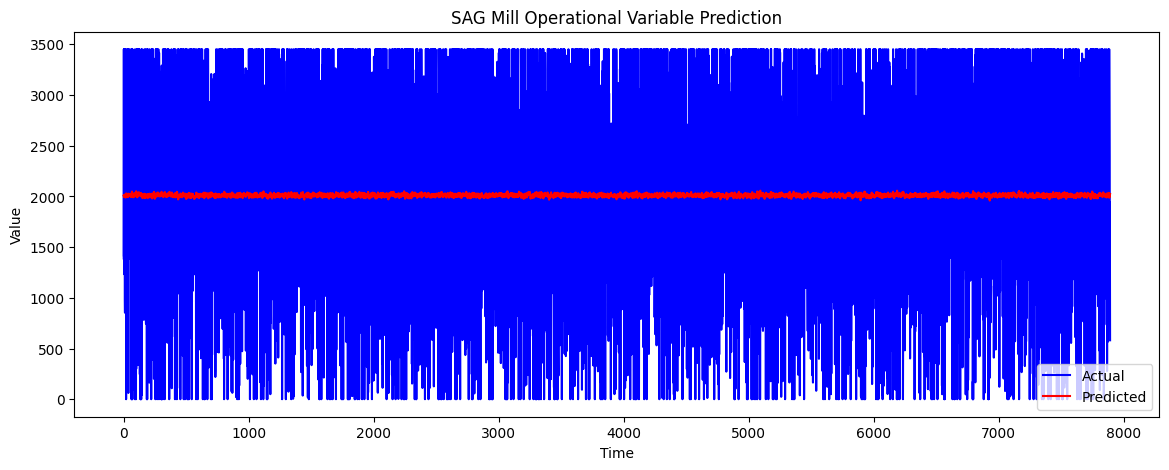

In [ ]:
# Display first few rows to verify
print("Training Data Sample:")
print(training_df.head())
print("\nTesting Data Sample:")
print(testing_df.head())

# Preprocess Data
# Combine training and testing data to apply scaling consistently
combined_data = pd.concat([training_df, testing_df], axis=0)

# Scale data to range [0, 1] for better LSTM performance
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(combined_data)

# Separate scaled data back into training and testing sets
scaled_training_data = scaled_data[:len(training_df)]
scaled_testing_data = scaled_data[len(training_df):]

# Define the sequence length for LSTM
sequence_length = 60  # Use 60 timesteps for each sequence, can be adjusted

# Prepare the input-output sequences for training data
X_train, y_train = [], []
for i in range(sequence_length, len(scaled_training_data)):
    X_train.append(scaled_training_data[i-sequence_length:i, :])  # Previous 60 timesteps as input
    y_train.append(scaled_training_data[i, 0])  # Predict next value for the first feature as output

X_train, y_train = np.array(X_train), np.array(y_train)

# Prepare the input-output sequences for testing data
X_test, y_test = [], []
for i in range(sequence_length, len(scaled_testing_data)):
    X_test.append(scaled_testing_data[i-sequence_length:i, :])  # Previous 60 timesteps as input
    y_test.append(scaled_testing_data[i, 0])  # Predict next value for the first feature as output

X_test, y_test = np.array(X_test), np.array(y_test)

# Define the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Single output unit

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the Model
# Make predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(np.concatenate((predicted, np.zeros((predicted.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, predicted))
print(f'Root Mean Squared Error: {rmse}')

# Plot Results
plt.figure(figsize=(14,5))
plt.plot(y_test_inv, color='blue', label='Actual')
plt.plot(predicted, color='red', label='Predicted')
plt.title('SAG Mill Operational Variable Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()